## ML Classification Project 5 Airline customer satisfaction level Decision Tree

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Project_5_Decision_Tree.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Describe data

In [3]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


## Basic data information 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10000 non-null  int64  
 1   id                                 10000 non-null  int64  
 2   Gender                             10000 non-null  object 
 3   Customer Type                      10000 non-null  object 
 4   Age                                10000 non-null  int64  
 5   Type of Travel                     10000 non-null  object 
 6   Class                              10000 non-null  object 
 7   Flight Distance                    10000 non-null  int64  
 8   Inflight wifi service              10000 non-null  int64  
 9   Departure/Arrival time convenient  10000 non-null  int64  
 10  Ease of Online booking             10000 non-null  int64  
 11  Gate location                      10000 non-null  int6

####  Drop Unnamed column

In [5]:
df.drop(['Unnamed: 0','id'], axis=1,inplace=True)

In [6]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Countplot of satisfaction

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

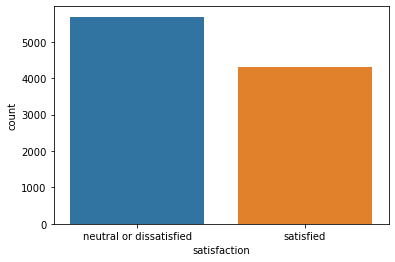

In [7]:
sns.countplot('satisfaction',data=df)

### Plot the mean value of satisfaction of male and female customers

## boxplot for Flight_Distance

<AxesSubplot:xlabel='Flight Distance'>

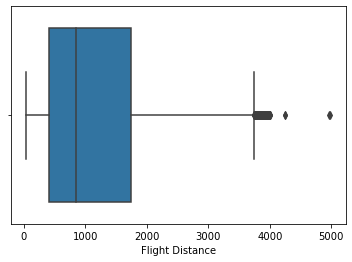

In [8]:
sns.boxplot('Flight Distance', data=df)

## boxplot for Checkin_service

<AxesSubplot:xlabel='Checkin service'>

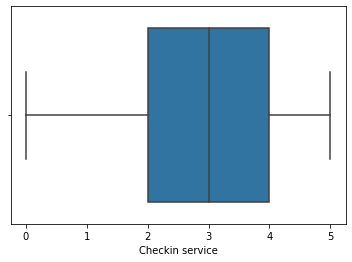

In [9]:
sns.boxplot('Checkin service',data=df)

##  Find Null value

In [10]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

##  Drop Null value

In [11]:
df.dropna(inplace=True)

## unique values in Flight_Distance

In [12]:
df['Flight Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

## Remove outliers using Z score method

In [13]:
df['zscore_Departure Delay in Minutes']=(df['Departure Delay in Minutes']-df['Departure Delay in Minutes'].mean())/df['Departure Delay in Minutes'].std()
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,zscore_Departure Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.267256
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,-0.360205
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,-0.386349
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,-0.098763
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,-0.386349


In [14]:
df=df[(df['zscore_Departure Delay in Minutes']<3) & (df['zscore_Departure Delay in Minutes']>-3)]
df.shape

(9752, 24)

In [15]:
df['zscore_Arrival Delay in Minutes']=(df['Arrival Delay in Minutes']-df['Arrival Delay in Minutes'].mean())/df['Arrival Delay in Minutes'].std()
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,zscore_Departure Delay in Minutes,zscore_Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.267256,0.312414
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,-0.360205,-0.226628
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,-0.386349,-0.496149
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,-0.098763,-0.091867
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,-0.386349,-0.496149


In [16]:
df=df[(df['zscore_Arrival Delay in Minutes']<3) & (df['zscore_Arrival Delay in Minutes']>-3)]
df.shape

(9465, 25)

In [17]:
df.drop(['zscore_Arrival Delay in Minutes','zscore_Departure Delay in Minutes'], axis=1,inplace=True)
df.shape

(9465, 23)

In [18]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Apply LableEncoding 

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
le=LabelEncoder()

In [21]:
df[['Gender','Customer Type','Type of Travel','Class','satisfaction']]=df[['Gender','Customer Type','Type of Travel','Class','satisfaction']].apply(le.fit_transform)

In [22]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,0,3599,3,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,1,0,38,0,0,3873,5,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,0,0,39,0,0,319,4,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,1,0,52,0,0,1363,5,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


## Split data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df.drop(['satisfaction'],axis=1)

In [25]:
y=df['satisfaction']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## Model - DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [28]:
model=DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pre=model.predict(x_test)

In [31]:
model.score(x_train,y_train)

1.0

In [32]:
model.score(x_test,y_test)

0.9181193872160591

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
cm=confusion_matrix(y_test,y_pre)
cm

array([[974,  84],
       [ 71, 764]], dtype=int64)

<AxesSubplot:>

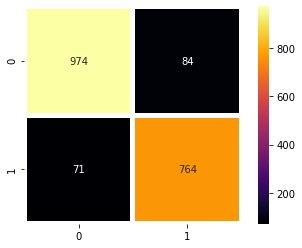

In [35]:
sns.heatmap(cm, annot=True,fmt='d',linewidths=4,square= True,capstyle='projecting',cmap='inferno')

In [36]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1058
           1       0.90      0.91      0.91       835

    accuracy                           0.92      1893
   macro avg       0.92      0.92      0.92      1893
weighted avg       0.92      0.92      0.92      1893



## apply all algorithm

In [37]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

In [39]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'dt':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis()
       }

In [40]:
for name, model in models.items():
    model1=model.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(y_test,y_pred)}") 
    print(f'{name} accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'{name} precision score: {precision_score(y_test,y_pred)}')
    print(f'{name} recall score: {recall_score(y_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(y_test,y_pred)}\n\n')

lr confuion matrix: 
 [[905 153]
 [162 673]]
lr accuracy score: 0.8335974643423137
lr precision score: 0.8147699757869249
lr recall score: 0.8059880239520958
lr classification report :
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1058
           1       0.81      0.81      0.81       835

    accuracy                           0.83      1893
   macro avg       0.83      0.83      0.83      1893
weighted avg       0.83      0.83      0.83      1893



sg confuion matrix: 
 [[1021   37]
 [ 504  331]]
sg accuracy score: 0.7142102482831485
sg precision score: 0.8994565217391305
sg recall score: 0.3964071856287425
sg classification report :
               precision    recall  f1-score   support

           0       0.67      0.97      0.79      1058
           1       0.90      0.40      0.55       835

    accuracy                           0.71      1893
   macro avg       0.78      0.68      0.67      1893
weighted avg       0.77